# Credit Card Customer Segmentation

The dataset contains information about the Credit Card company clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.


In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

Analyze the dataset;

Prepare the data for modeling;

Find an appropriate number of clusters;

Segment the data;

Interpret and explain the results.


In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


/Users/taranjitkaur/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Familiarize ourselves with the dataset.

In [4]:
customer_df = pd.read_csv("customer_segmentation.csv",skipinitialspace = True)
customer_df.head()


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [5]:
customer_df["education_level"] =customer_df["education_level"].str.replace(' ', '')
customer_df["education_level"] =customer_df["education_level"].str.replace('-', '')
customer_df

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,HighSchool,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,HighSchool,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,HighSchool,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [6]:
# Print out the number of features and observations in the dataset.
customer_df.shape

(10127, 14)

In [7]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

### Exploring and analyzing the numerical columns.

In [8]:
#Display the summary statistics for the dataset.
customer_df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


### Explore and Analyze the Categorical Features

In [9]:
#Calculate and print the number of missing values in each column.
customer_df.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

Let's start dealing with the categorical columns. There are three of them: gender, education level, and marital status.

First, let's check on the gender and education_level columns.

In [10]:
customer_df['education_level'].value_counts()

education_level
Graduate        3685
HighSchool      2351
Uneducated      1755
College         1192
PostGraduate     616
Doctorate        528
Name: count, dtype: int64

In [11]:
customer_df['gender'].value_counts()

gender
F    5358
M    4769
Name: count, dtype: int64

In [12]:
customer_df['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [13]:
customer_df.education_level.replace

<bound method Series.replace of 0        HighSchool
1          Graduate
2          Graduate
3        HighSchool
4        Uneducated
            ...    
10122      Graduate
10123      Graduate
10124    HighSchool
10125      Graduate
10126      Graduate
Name: education_level, Length: 10127, dtype: object>

### Feature Engineering

There are three categorical columns: gender, education level, and marital status.
    
The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

But before we do the modifications, it's important to create a copy of the original DataFrame. We'll make all the modifications in the copy and leave the original DataFrame untouched so we can use it to analyze the results later


In [14]:
# Create a copy of the original DataFrame. Call it customers_modif, for instance.
customer_modif=customer_df.copy()
customer_modif

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,HighSchool,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,HighSchool,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,HighSchool,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [15]:
customer_modif.gender.replace(to_replace=dict(F=1, M=0), inplace=True)

Replace the values in the education_level column in the order below. 

In [16]:
customer_modif

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,0,3,HighSchool,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,1,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,0,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,1,4,HighSchool,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,0,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,0,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,0,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,1,1,HighSchool,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,0,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [17]:
customer_modif.education_level.replace(to_replace=dict(Uneducated=0), inplace=True)
customer_modif.education_level.replace(to_replace=dict(HighSchool=1), inplace=True)
customer_modif.education_level.replace(to_replace=dict(College=2), inplace=True)
customer_modif.education_level.replace(to_replace=dict(Graduate=3), inplace=True)
customer_modif.education_level.replace(to_replace=dict(PostGraduate=4), inplace=True)
customer_modif.education_level.replace(to_replace=dict(Doctorate=5), inplace=True)


In [18]:
customer_modif

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,0,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,1,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,0,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,1,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,0,3,0,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,0,2,3,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,0,2,3,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,1,1,1,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,0,2,3,Unknown,47000,36,4,3,5281.0,8395,62,0.000


Now, let's deal with the marital_status columns. This column contains these unique values:

Single

Married

Divorced

Unknown

Unfortunately, we can't do the same for this marital_status column as for the last categorical column. As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others, which means we can't rank these categories objectively.

Therefore, we'll use one-hot-encoding to create dummy variables from this column


Use the pandas.get_dummies() function to create a dataframe containing dummy variables for the unique values in the marital_status.



Combine the new DataFrame with the original.

Drop the original marital_status column.

### Convert the categorical features into dummy variables.

In [19]:
customer_modif = pd.get_dummies(data = customer_modif, columns = ["marital_status"], drop_first = True)


In [20]:
customer_modif 

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,0,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,1,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,0,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,1,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,0,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,0,2,3,51000,40,3,2,4003.0,15476,117,0.462,False,True,False
10123,710638233,41,0,2,3,40000,25,4,2,4277.0,8764,69,0.511,False,False,False
10124,716506083,44,1,1,1,33000,36,5,3,5409.0,10291,60,0.000,True,False,False
10125,717406983,30,0,2,3,47000,36,4,3,5281.0,8395,62,0.000,False,False,True


### Scaling the Data

In [21]:
scaler= StandardScaler()
scaled_data = scaler.fit_transform(customer_modif)


Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

Create a new DataFrame without the column customer_id.

Instantiate an object from the scikit-learn's StandardScaler() class and fit the new DataFrame.

Use the transform method to scale the data. Assign it to a different variable and print it.

As the outcome of the scaler is an array, we can transform it back to a DataFrame using pd.DataFrame().

In [22]:
customer = customer_modif.drop('customer_id', axis=1)

In [23]:


scaler = StandardScaler()
scaler.fit(customer)

customer_scaled = scaler.transform(customer)
customer_scaled[:5]


array([[-0.16540558, -1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038,  0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837, -1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553,  0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553, -1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization

### Choosing K

Create an empty list to store the inertia from every model.

Use a for loop to the following process for different numbers of K. Loop in a range from 1 to 10, for example.

For each K in the loop:
    
Instantiate a Kmeans object setting n_clusters=k.

Use fit_predict() to create clusters.

Append the inertia_ attribute of the model to the empty list.

Use the list to plot the elbow curve. Decide how many clusters to use and explain this decision.

Instantiate a new Kmeans object, but this time use the decided number of clusters as K.

fit_predict the data and print the outcome.

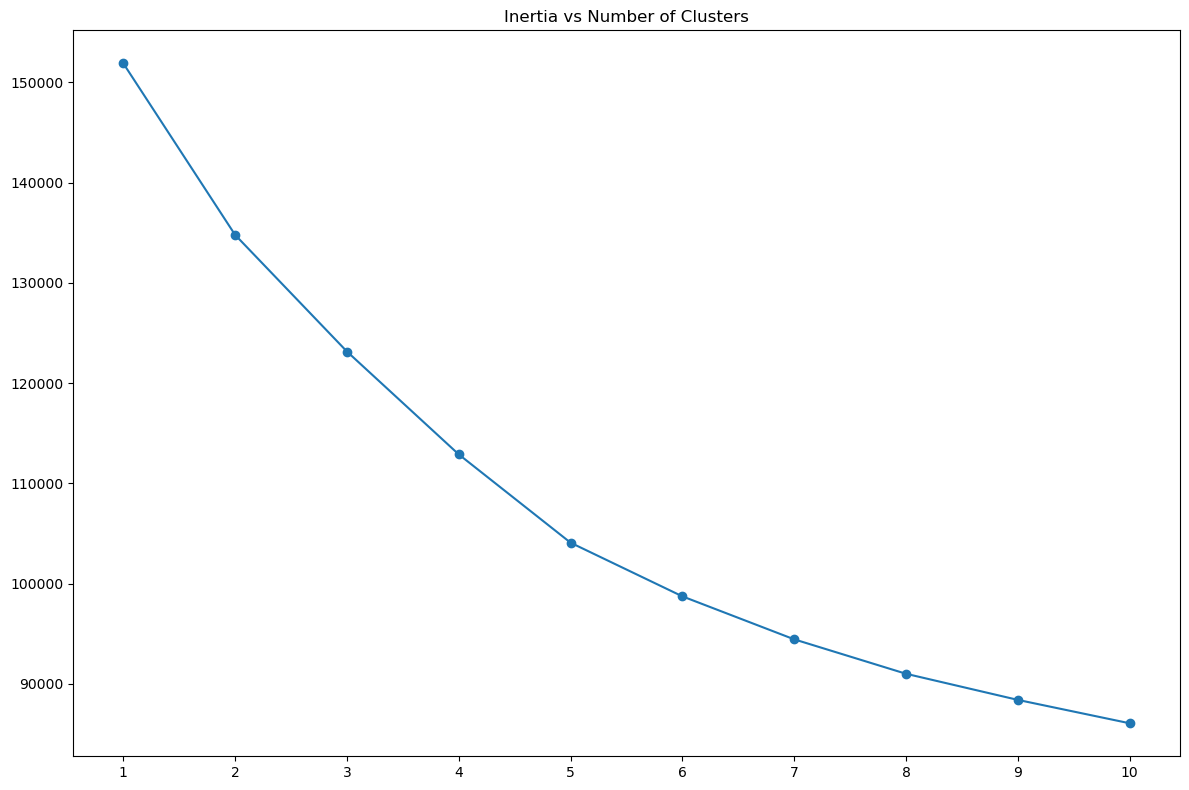

In [24]:
import pandas as pd
customer = pd.DataFrame(customer_scaled)
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    cluster = model.fit_predict(customer)
    inertias.append(model.inertia_)
        
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1,11), labels=range(1,11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()


model.inertia_: the inertia resulting from the clusters split.

model.cluster_centers_: the coordinates of the final centroids.

model.n_iter_: the number of iterations necessary to converge into the resulting clusters.

model.n_features_in_: the number of features passed to the model.

It looks like the rate of decreasing of the inertia slows down between 5 and 7 clusters. We'll use 6 clusters to move on.

In [25]:

from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
clusters = model.fit_predict(customer)
print(clusters)
print(model.inertia_)
print(model.cluster_centers_)
print(model.n_iter_)
print(model.n_features_in_)

print(inertias)


[4 1 4 ... 3 5 3]
98723.67252356817
[[ 1.36290611e+00  1.44338095e-01 -9.13297679e-01  2.11017659e-02
  -2.81290961e-01  1.26688828e+00  2.02643041e-01  1.01731893e-01
  -4.14664589e-01 -4.56785628e-01 -5.21783541e-01  2.84475415e-01
   3.94687163e-01 -2.52193161e-01 -2.82608874e-01]
 [-2.98941435e-01  3.60895003e-01  8.72479916e-02  5.43684944e-03
  -3.93146262e-01 -2.73597256e-01  6.40936465e-02 -1.16042971e-02
  -4.14465575e-01 -1.88493804e-01  1.96614774e-02  2.01450219e-01
  -9.28213813e-01  1.25233740e+00 -2.82608874e-01]
 [-1.18386691e-01 -3.64272498e-01 -3.04961996e-02 -5.32642729e-02
   1.78991714e-01 -8.58439984e-02 -1.05232221e+00 -1.39690301e-01
   6.58010417e-01  2.60330499e+00  1.77970015e+00 -3.91921580e-01
   3.04840252e-02  6.23969995e-02 -2.32221162e-01]
 [-4.01868624e-01  3.68368217e-01  2.43967179e-01  2.40831076e-02
  -4.14520286e-01 -3.75857490e-01  8.77991338e-02 -1.44979305e-02
  -4.67936404e-01 -2.48380493e-01 -1.26977057e-01  2.87823230e-01
   8.14680503e-01 -

In [26]:
num_clusters= 6
kmeans = KMeans(n_clusters = num_clusters, random_state= 42)
customer_modif['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
customer_modif

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown,KMeans_Cluster
0,768805383,45,0,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False,2
1,818770008,49,1,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False,0
2,713982108,51,0,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False,2
3,769911858,40,1,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True,3
4,709106358,40,0,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,0,2,3,51000,40,3,2,4003.0,15476,117,0.462,False,True,False,4
10123,710638233,41,0,2,3,40000,25,4,2,4277.0,8764,69,0.511,False,False,False,1
10124,716506083,44,1,1,1,33000,36,5,3,5409.0,10291,60,0.000,True,False,False,1
10125,717406983,30,0,2,3,47000,36,4,3,5281.0,8395,62,0.000,False,False,True,3


### Analyzing Results

Create a new column called CLUSTER in the original customers DataFrame. This column should contain the cluster assigned to each customer by the algorithm.

In [27]:
customer_df['Cluster'] = clusters + 1

customer_df

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Cluster
0,768805383,45,M,3,HighSchool,Married,69000,39,5,1,12691.0,1144,42,0.061,5
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,5
3,769911858,40,F,4,HighSchool,Unknown,37000,34,3,4,3313.0,1171,20,0.760,6
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,3
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,4
10124,716506083,44,F,1,HighSchool,Married,33000,36,5,3,5409.0,10291,60,0.000,4
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,6


Group each numeric variable by the CLUSTER column and plot a bar chart. Analyze the clusters' characteristics regarding each variable. Explain the conclusions

In [28]:
customer_df['Cluster'].value_counts()

Cluster
4    2788
2    2483
5    1789
1    1420
3     910
6     737
Name: count, dtype: int64

We see cluster 4 is largest and cluster 1 is smallest.Considering the numeric variable only, we'll check on the average value of each variable per cluster. We just need to group the data and plot a bar chart for each column.

### Interpreting Results — Numerical Variables¶

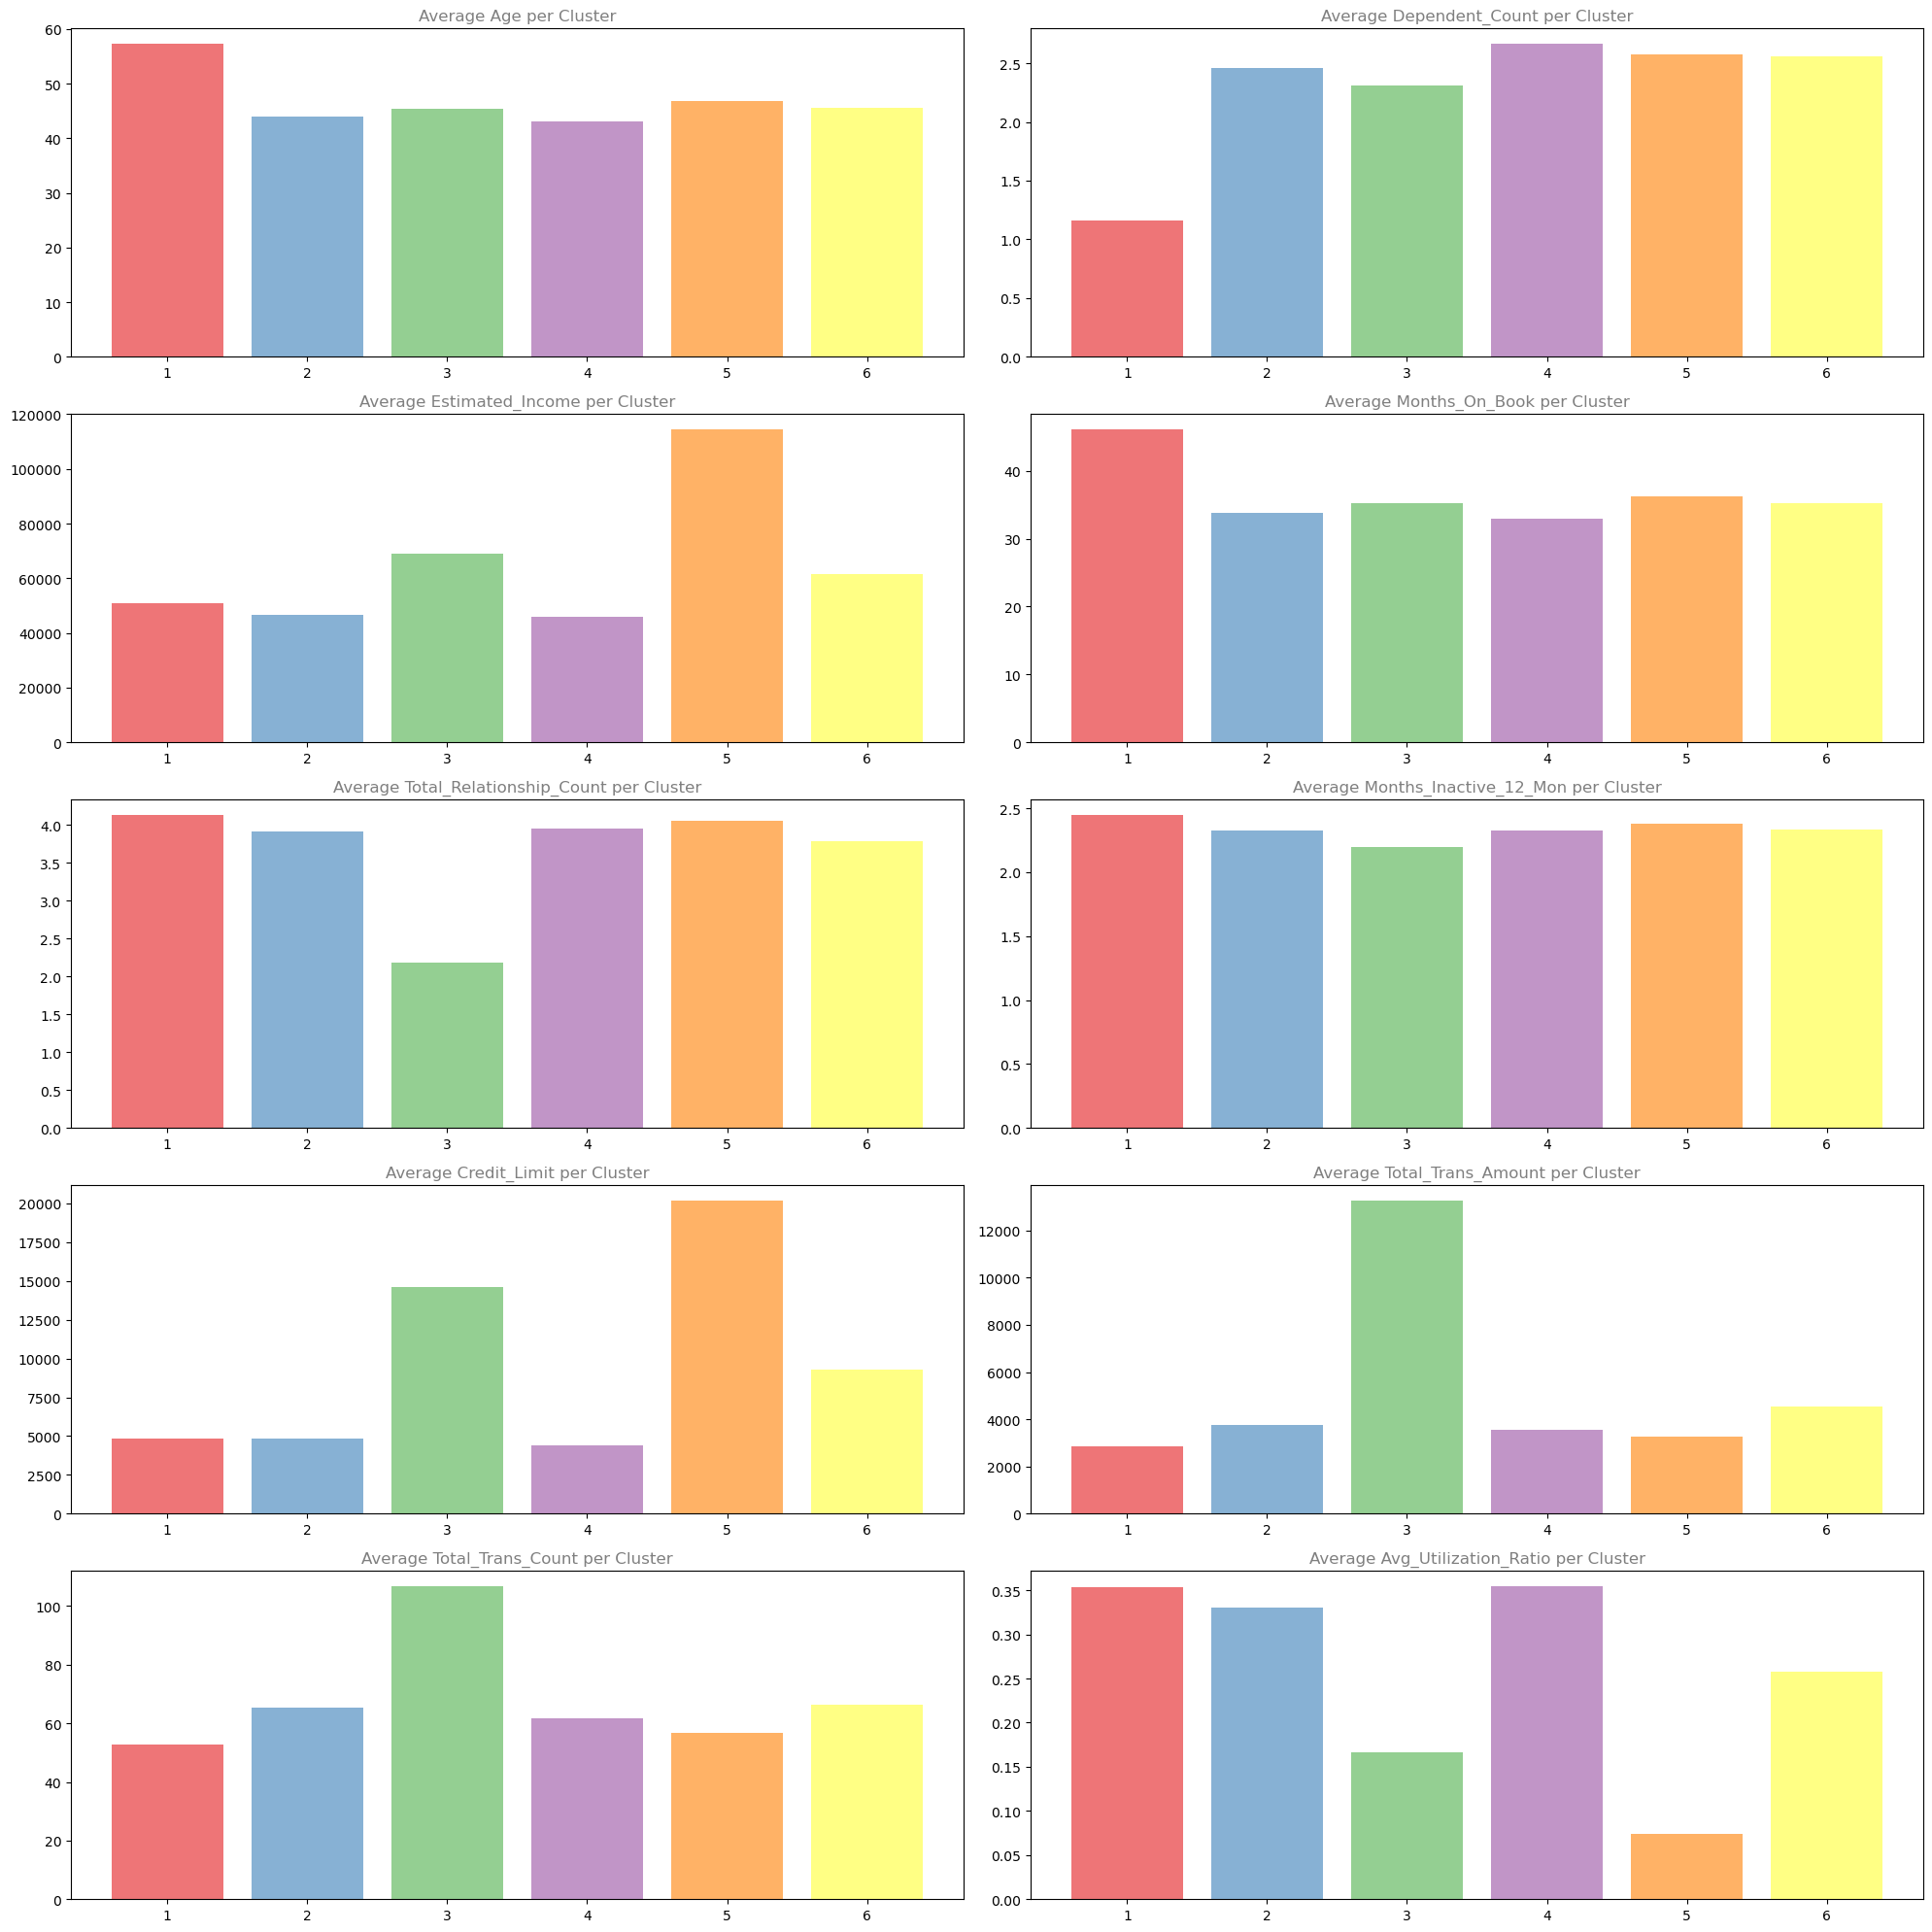

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = customer_df.select_dtypes(include=np.number).drop(['customer_id','Cluster'],axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customer_df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

We can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

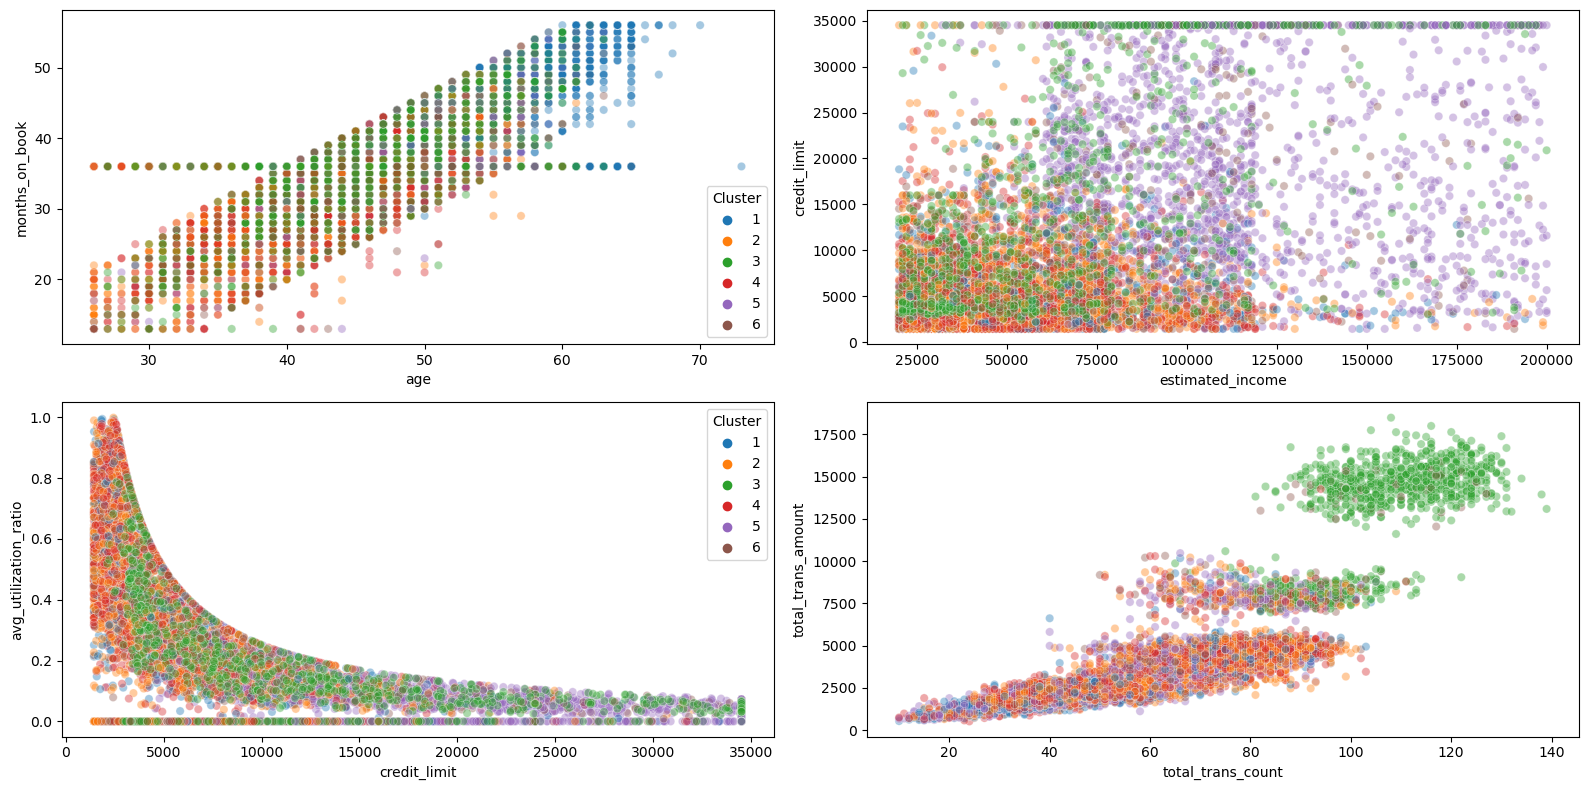

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='Cluster', data=customer_df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='Cluster', data=customer_df, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='Cluster', data=customer_df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='Cluster', data=customer_df, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.


/var/folders/y0/hsj3fhgj4l5fyf2wpjy4qx_c0000gn/T/ipykernel_17087/2999039747.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/var/folders/y0/hsj3fhgj4l5fyf2wpjy4qx_c0000gn/T/ipykernel_17087/2999039747.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/var/folders/y0/hsj3fhgj4l5fyf2wpjy4qx_c0000gn/T/ipykernel_17087/2999039747.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


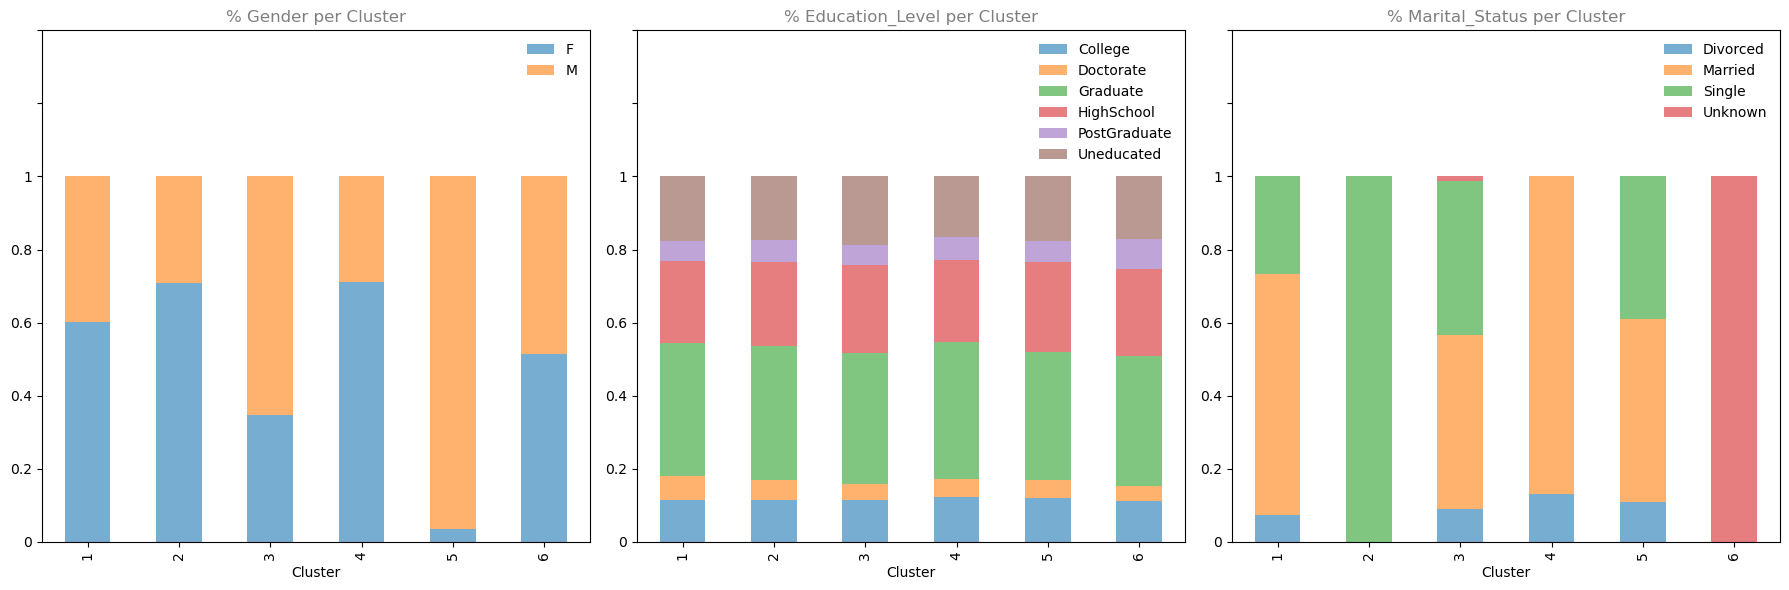

In [31]:
cat_columns = customer_df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customer_df['Cluster'], columns=customer_df[col], values=customer_df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

Considering the categorical variables, we notice that the education level is well divided between clusters
In other highlights, Cluster 4 is composed almost entirely of married people, while we don't know the marital status of anybody in Cluster 1. Cluster 3 is almost completely male and Cluster 5 is 100% made of single people.



In [32]:
#Conclusion

# As demanded by the company, we now have listed the most important characteristics of each cluster. We could also some suggestions and insights into each one of them.

# In the end, we have the list of customers with a cluster assigned to each one.

# Cluster 1

# Characteristics: Mostly men; high credit limit; high amount transitioned; high number of transactions; low utilization rate.

# Insight: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

# Cluster 2

# Characteristics: Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.

# Insight: Married people (majority women) with low income and limit but utilize too much of their credit with a few larger purchases

# Cluster 3

# Cluster 3: Gender well divided; low credit limit, high utilization rate; marital status 100% unknown; smaller cluster.

# Insight: Men and women with low credit limits but do have high balances.

# Cluster 4

# Cluster 4: Mostly men, mostly single and married, high estimated income, high credit limit; low amount transitioned; low utilization rate.

# Insight: People (majority men) with high income and credit limits, but don't use the card. Could be incentivized to use it.

# Cluster 5

# Cluster 5: Mostly married, high age, low dependent count, long time customers, low credit limit, low amount transitioned, high utilization rate.

# Insight: Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

# Cluster 6

# Cluster 6: Mostly women; 100% single people, low estimated income, low credit limit, low amount transitioned, high utilization rate.

# Insight: Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.


In [2]:
#Credit Card Transaction RMF analysis 

In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


/Users/taranjitkaur/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#Load data
data = pd.read_csv('Creditcardtransactions.csv')

In [6]:
data.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns={'index':'id'}, inplace= True)
data

,id,City,Date,Card Type,Exp Type,Gender,Amount,Recency
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,210
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,278
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,273
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,410
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,22
...,...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,339
26048,26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,297
26049,26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,131
26050,26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174,255


In [17]:
#Calculate the recency, frequency and monetary values
current_date = data['Date'].max() + pd.DateOffset(days =1)
data['Recency'] = (current_date- data['Date']).dt.days
rfm = data.groupby('id').agg({'Recency':'min','Amount':['sum','count']})
                                                                              
rfm

Recency  Amount      
          min     sum count
id                         
0         210   82475     1
1         278   32555     1
2         273  101738     1
3         410  123424     1
4          22  171574     1
...       ...     ...   ...
26047     339  128191     1
26048     297  246316     1
26049     131  265019     1
26050     255   88174     1
26051     585  184410     1

[26052 rows x 3 columns]

In [19]:
#Flatten the multilevelcolumn index
rfm.columns = rfm.columns.map('-'.join)
rfm.columns


Index(['Recency-min', 'Amount-sum', 'Amount-count'], dtype='object')

In [23]:
# Rename columns for clarity
rfm.rename(columns={'Recency-min':'Recency','Amount-sum': 'Monetary','Amount-count':'Frequency'}, inplace= True)
rfm

,Recency,Monetary,Frequency
id,,,
0,210,82475,1
1,278,32555,1
2,273,101738,1
3,410,123424,1
4,22,171574,1
...,...,...,...
26047,339,128191,1
26048,297,246316,1
26049,131,265019,1


In [29]:
# Perform RFM score calculations
rfm['R_score'] = pd.cut(rfm['Recency'], bins= [0,30,60,90,120, float('inf')],labels= [5,4,3,2,1],right= False)


In [30]:
# Perform RFM score calculations
rfm['F_score'] = pd.cut(rfm['Frequency'], bins= [1,2,3,4,float('inf')],labels= [1,2,3,4],right= False)


In [31]:
# Perform RFM score calculations
rfm['M_score'] = pd.cut(rfm['Monetary'],4,labels= [4,3,2,1])


In [33]:
#Calculate RFM segment and overall score
rfm['RFM_Segment']= rfm['R_score'].astype(str)+ rfm['F_score'].astype(str) + rfm ['M_score'].astype(str)
rfm['RFM_Score']= rfm[['R_score','F_score','M_score']].sum(axis=1)

In [34]:
rfm

,Recency,Monetary,Frequency,M_score,R_score,F_score,RFM_Segment,RFM_Score
id,,,,,,,,
0,210,82475,1,4,1,1,114,6
1,278,32555,1,4,1,1,114,6
2,273,101738,1,4,1,1,114,6
3,410,123424,1,4,1,1,114,6
4,22,171574,1,4,5,1,514,10
...,...,...,...,...,...,...,...,...
26047,339,128191,1,4,1,1,114,6
26048,297,246316,1,4,1,1,114,6
26049,131,265019,1,3,1,1,113,5


In [38]:
#Define labels for segments
def segments_labels(row):
    if row['RFM_Score'] >= 9:
        return 'High Value'
    elif (row['RFM_Score']>=5) and (row[ 'RFM_Score']< 9):
        return 'Mid Value'
    else :
        return 'Low Value'
    
rfm['Segment'] = rfm.apply(segments_labels , axis = 1)
print(rfm)
        


       Recency  Monetary  Frequency M_score R_score F_score RFM_Segment   
id                                                                        
0          210     82475          1       4       1       1         114  \
1          278     32555          1       4       1       1         114   
2          273    101738          1       4       1       1         114   
3          410    123424          1       4       1       1         114   
4           22    171574          1       4       5       1         514   
...        ...       ...        ...     ...     ...     ...         ...   
26047      339    128191          1       4       1       1         114   
26048      297    246316          1       4       1       1         114   
26049      131    265019          1       3       1       1         113   
26050      255     88174          1       4       1       1         114   
26051      585    184410          1       4       1       1         114   

       RFM_Score     Seg

Text(0, 0.5, 'Frequency')

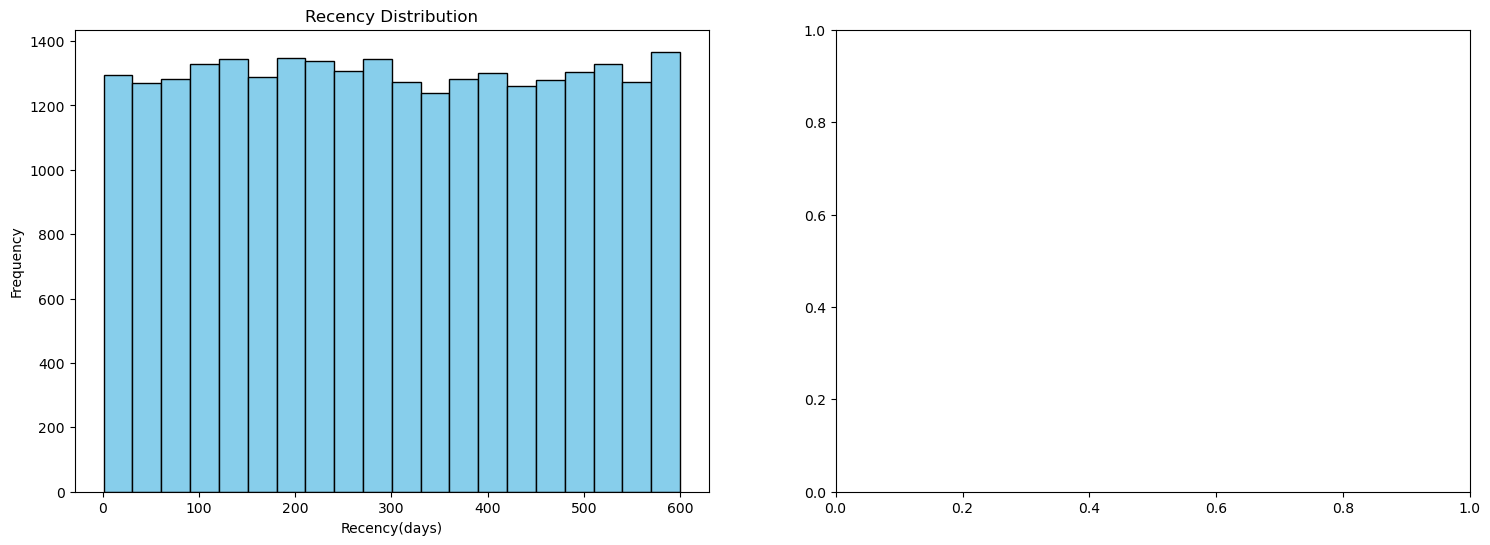

In [43]:
# Create Subplots
fig, axes = plt.subplots(nrows =1 , ncols= 2, figsize= (18,6))
# Recency distribution
axes[0].hist(rfm['Recency'], bins = 20, color = 'skyblue', edgecolor= 'black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency(days)')
axes[0].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

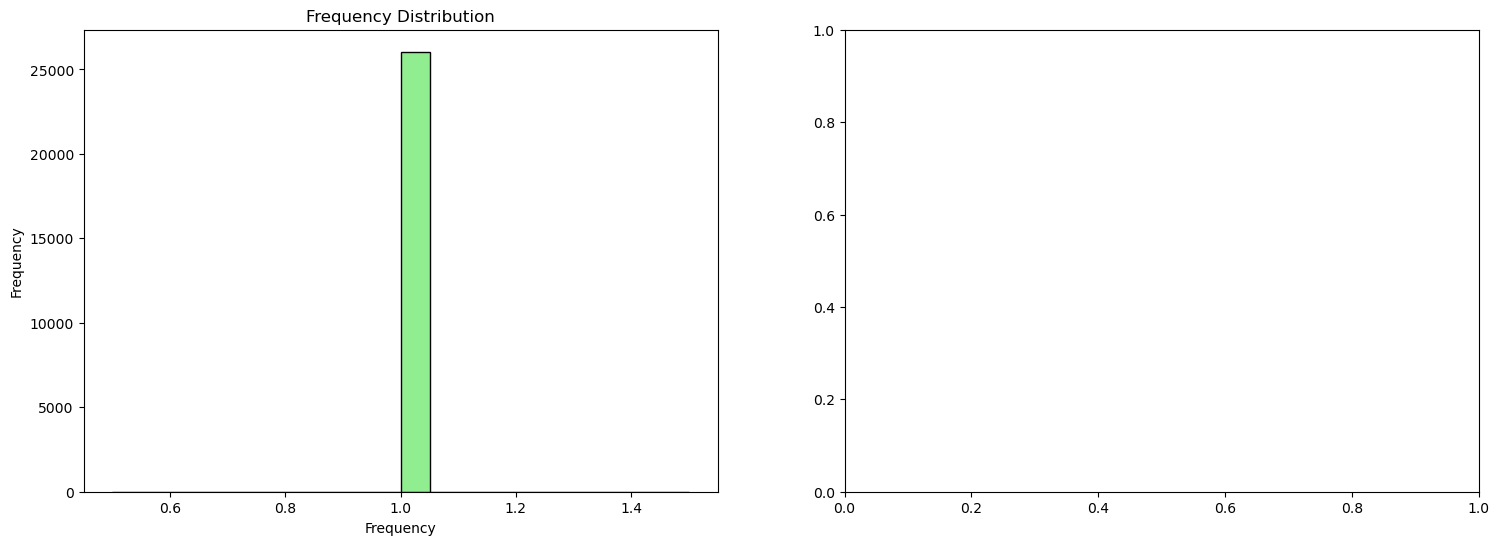

In [44]:
# Create Subplots
fig, axes = plt.subplots(nrows =1 , ncols= 2, figsize= (18,6))
# Recency distribution
axes[0].hist(rfm['Frequency'], bins = 20, color = 'lightgreen', edgecolor= 'black')
axes[0].set_title('Frequency Distribution')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

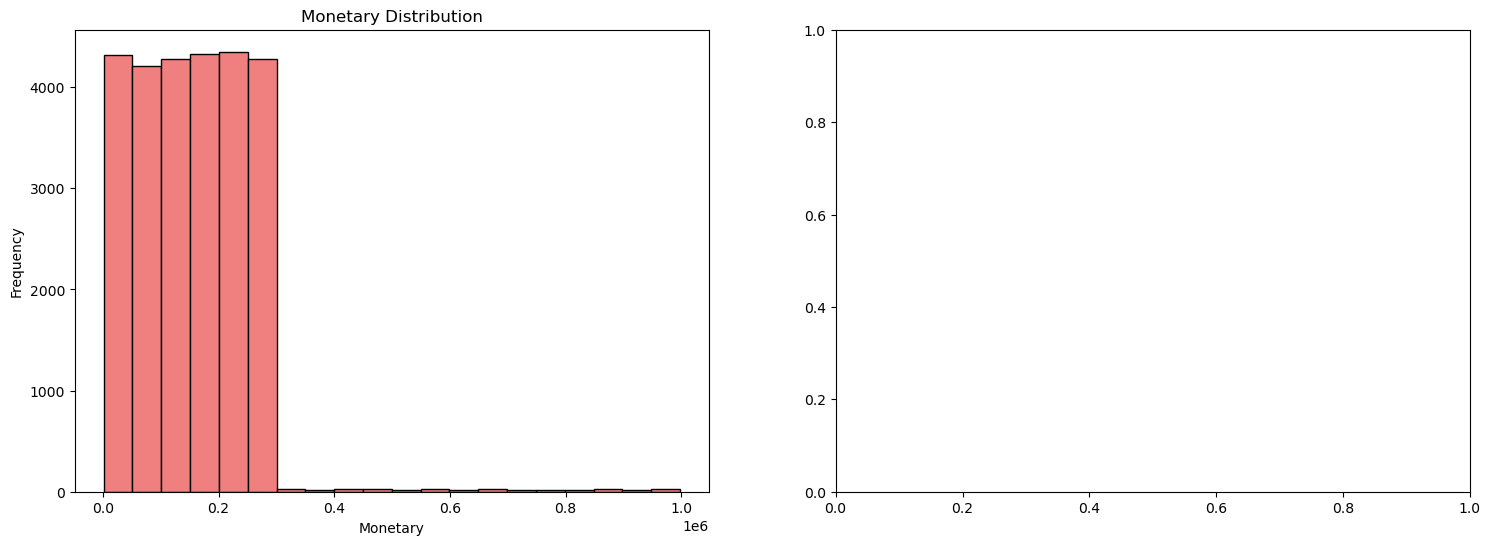

In [45]:
# Create Subplots
fig, axes = plt.subplots(nrows =1 , ncols= 2, figsize= (18,6))
# Recency distribution
axes[0].hist(rfm['Monetary'], bins = 20, color = 'lightcoral', edgecolor= 'black')
axes[0].set_title('Monetary Distribution')
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Frequency')


In [46]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

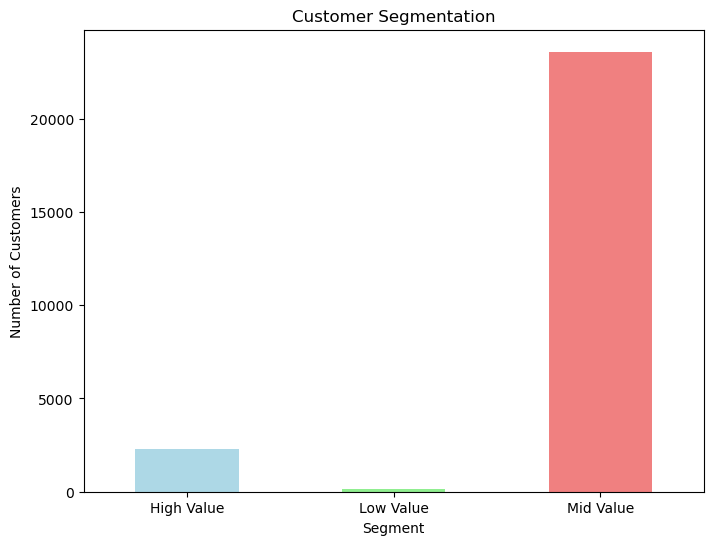

In [47]:
#Bar plots of RFM SEGMENT
segment_counts =rfm['Segment'].value_counts().sort_index()
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color= ['lightblue','lightgreen','lightcoral'])
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation =0)
plt.show()

In [48]:
#This analysis shows that mid value cistomers are most number of customers.